
<h1><center><b> Project Data Analysis </b></center></h1>
<h3><center><b> Initial Analysis New York City Taxi and Limousine Commission (TLC) Vendor performance for Increase Profit </b></center></h3>
<center> Dataset : NYC TLC Trip Record in January 2023 </center>

<h3><b>Table Of Contents :</b></h3>
I. Business Background

II. Problme Statement

III. Business Problem
    
        3.1 Objective
        3.2 Questions to Address

IV. Exploratory Data Analysis (EDA)

        4.1 Dataset
            4.1.1 Libraries
            4.1.2 Import Data
        4.2 Data Understanding & Cleaning
            4.2.1 Column Details
            4.2.2 Date Time
            4.2.3 Missing Value
            4.2.4 Duplicate Value
            4.2.3 Unique Value
            4.2.5 Outliers
            4.2.6 Summary

<h2><b> I. Business Background </b></h2>
<b> The New York City Taxi and Limousine Commission (TLC) </b> was established in 1971 to license and regulate the city’s taxi cabs, for-hire vehicles, commuter vans, and paratransit vehicles. The TLC collects trip record data to monitor, regulate, and improve the taxi services in NYC. <b>Analyzing this data helps in identifying trends, optimizing routes, and improving service quality.</b>

<h2><b> II. Problem Statement </b></h2>

<b>The NYC Taxi and Limousine Commission (NYC TLC)</b> wants to analyze the performance of two vendors based on various metrics such as, trip distance, passenger count, and total amount. <b>The goal</b> is to determine which vendor is more valuable or profitable. This analysis aims to <b>provide insights</b> that can help increase profit for <b>recommendations on vendor selection.</b>
<br><br>

<h2><b> III. Business Problem </b></h2>

<h3><b> 3.1 Objective </b></h3>
To analyze vendor performance in order to increase profit, identify the key factors that affect profit.

<h3><b> 3.2 Questions to Address</b></h3>

   - Which vendor (Vendor 1 or Vendor 2) is more profitable?
   - What are the key metrics that contribute to the profitability of each vendor?

<h2><b> IV. Exploratory Data Analysis (EDA)</b></h2>

<h2><b> 4.1. Dataset </b></h2>

- The New York City Taxi and Limousine Comission Trip Records in January 2023 dataset includes <b>vendorID, pickup - dropoff datetime and location, passenger count,payment type, trip type, total amount</b> (aggregate from fare amount, extra, mta tax, tip amount, improvement and congestion surchagres).
- The Taxi Zone dataset includes <b> X-Y coordinate, id zone, zone name, length and area shape, location id, borough, latitude and longitude.</b>


<h3><b> 4.1.1 Libraries </b></h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b> 4.1.2 Import Data </b></h3>

In [3]:
taxi_trip = pd.read_csv('NYC TLC Trip Record.csv') # import dataset NYC TLC Trip Record
taxi_zone = pd.read_csv('taxi_zones.csv') # import dataset Taxi Zone

display('NYC TLC Trip Record : ',taxi_trip.head())
display('NYC TLC Taxi Zones : ' ,taxi_zone.head())

C:\Users\HP\AppData\Local\Temp\ipykernel_16612\1069172521.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_trip = pd.read_csv('NYC TLC Trip Record.csv') # import dataset NYC TLC Trip Record


'NYC TLC Trip Record : '

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


'NYC TLC Taxi Zones : '

,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,Latitude,Longitude
0,9.352230e+05,190535.052575,1,0.116357,0.000782,Newark Airport,1,EWR,35.475594,-83.290731
1,1.032516e+06,167292.493195,2,0.433470,0.004866,Jamaica Bay,2,Queens,35.742300,-90.562330
2,1.025883e+06,254779.600631,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,33.293157,-86.767961
3,9.906188e+05,203105.532318,4,0.043567,0.000112,Alphabet City,4,Manhattan,40.724545,-73.979050
4,9.314680e+05,139837.478389,5,0.092146,0.000498,Arden Heights,5,Staten Island,39.809279,-75.486587


<h2><b>4.2. Data Understanding & Cleaning</b></h2>

Let's take a look into dataset

In [4]:
# Dataset Shape
print(f'Number of rows and columns of the NYC TLC Trip Record Dataset : {taxi_trip.shape}')
print(f'Number of rows and columns of the Taxi Zone Dataset : {taxi_zone.shape}')


Number of rows and columns of the NYC TLC Trip Record Dataset : (68211, 20)
Number of rows and columns of the Taxi Zone Dataset : (263, 10)


In [5]:
print(f'Information on the NYC TLC Trip Record Datasete : \n')
taxi_trip.info()

Information on the NYC TLC Trip Record Datasete : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  eh

In [6]:
print(f'Information on the Taxi Zone Dataset : \n')
taxi_zone.info()

Information on the Taxi Zone Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           263 non-null    float64
 1   Y           263 non-null    float64
 2   OBJECTID    263 non-null    int64  
 3   Shape_Leng  263 non-null    float64
 4   Shape_Area  263 non-null    float64
 5   zone        263 non-null    object 
 6   LocationID  263 non-null    int64  
 7   borough     263 non-null    object 
 8   Latitude    263 non-null    float64
 9   Longitude   263 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 20.7+ KB


In [7]:
numerical_columns = taxi_trip.select_dtypes(include=['int', 'float']).columns
taxi_trip[numerical_columns].describe().loc[['mean','min','max']]

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
mean,1.863028,1.11716,98.549735,138.429901,1.31587,8.114852,16.603545,0.825431,0.58834,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
min,1.000000,1.00000,1.000000,1.000000,0.00000,0.000000,-70.000000,-2.500000,-0.50000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
max,2.000000,99.00000,265.000000,265.000000,9.00000,120098.840000,490.000000,12.500000,2.75000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


- Minus values, make all numerical columns into abs 

In [8]:
# Take absolute value of numerical columns
taxi_trip[numerical_columns] = taxi_trip[numerical_columns].abs()

<h3><b> 4.2.1. Column Details</b></h3>

**a. NYC TLC Trip Records Dataset**

- **Vendor ID :** LPEP provider that provided the record.
<br>
1 = Creative Mobile Technologies, LLC.
<br>
2 = VeriFone Inc.

- **lpep_pickup_datetime :** The timestamp indicating when the trip began.
- **lpep_dropoff_datetime :** The timestamp indicating when the trip ended.
- **Passenger_count :** The number of passenger in the vehicle. This is a driver-entered value.
- **Trip Distance :** The length of the trip in miles, by the taximeter.
- **PULocationID :** A unique identifier for the pickup location.
- **DOLocationID :** A unique identifier for the dropoff location
- **RateCodeID :** A code indicating the rate type for the trip.
<br>
1 = Standard rate
<br>
2 = JFK
<br>
3 = Newark
<br>
4 = Nassau or Westchester
<br>
5 = Negotiated fare
<br>
6 = Group ride

- **Store_and_fwd_flag :** 'Y' if the trip data was stored and forwarded later, 'N' if not
- **Payment_type :** A code indicating the payment method used.
<br>
1 = Credit card
<br>
2 = Cash
<br>
3 = No charge
<br>
4 = Dispute
<br>
5 = Unknown
<br>
6 = Voided trip

- **Fare_amount :** The fare charged for the trip.
- **Extra :** Additional charges, such as surcharges.
- **MTA_tax :** Tax amount for the Metropolitan Transportation Authority.
- **Improvement_surchanges :** A surcharge for improvements.
- **Tip_amount :** Tip given to the driver.
- **Tolls_amount :** Total tolls paid during the trip.
- **Total_amount :** The total amount paid by the passenger. Does not
include cash tips.
- **Trip_type :** A code indicating the trip type, the street (1) or dispatched (2).

**b. Taxi Zones Dataset**

- **X :** X coordinate for the zone location.
- **Y :** Y coordinate for the zone location.
- **OBJECTID :** A unique identifier for the taxi zone.
- **Shape_Leng :** The lenght of the shape representing the zone.
- **Shape_Area :** The area of the shape representing the zone.
- **zone :** The name of the taxi zone.
- **LocationID :** A unique identifier for the location.

- **borough :** The name of the borough where the zone is located.
- **Latitude :** The latitude of the zone's central point.
- **Longitude :** The longitude of the zone's central point.

<h3><b> 4.2.2. Date Time</b></h3>

In [9]:
taxi_trip['lpep_pickup_datetime']=pd.to_datetime(taxi_trip['lpep_pickup_datetime'])
taxi_trip['lpep_dropoff_datetime']=pd.to_datetime(taxi_trip['lpep_dropoff_datetime'])

In [10]:
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [11]:
# Add the new columns next to lpep_pickup_datetime
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 1, 'pickup_day', taxi_trip['lpep_pickup_datetime'].dt.day_name())
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 2, 'pickup_day_no', taxi_trip['lpep_pickup_datetime'].dt.weekday)
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 3, 'pickup_hour', taxi_trip['lpep_pickup_datetime'].dt.hour)
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 4, 'pickup_month', taxi_trip['lpep_pickup_datetime'].dt.month)
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 5, 'pickup_year', taxi_trip['lpep_pickup_datetime'].dt.year)

duration_minutes = (taxi_trip['lpep_dropoff_datetime'] - taxi_trip['lpep_pickup_datetime']).dt.total_seconds().div(60)
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 2, 'duration', duration_minutes)

In [12]:
# Extract the time part of lpep_pickup_datetime
taxi_trip['pickup_time'] = taxi_trip['lpep_pickup_datetime'].dt.time
# Insert the new column next to lpep_pickup_datetime
taxi_trip.insert(taxi_trip.columns.get_loc('lpep_pickup_datetime') + 1, 'pickup_time', taxi_trip.pop('pickup_time'))

In [13]:
taxi_trip.head()

,VendorID,lpep_pickup_datetime,pickup_time,pickup_day,duration,pickup_day_no,pickup_hour,pickup_month,pickup_year,lpep_dropoff_datetime,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,00:26:10,Sunday,11.016667,6,0,1,2023,2023-01-01 00:37:11,...,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,00:51:03,Sunday,6.766667,6,0,1,2023,2023-01-01 00:57:49,...,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,00:35:12,Sunday,6.333333,6,0,1,2023,2023-01-01 00:41:32,...,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,00:13:14,Sunday,5.816667,6,0,1,2023,2023-01-01 00:19:03,...,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,00:33:04,Sunday,5.966667,6,0,1,2023,2023-01-01 00:39:02,...,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [14]:
# Filter date time into January 2023
# Filter out rows where the date is outside of January 2023
out_Jan_23 = taxi_trip[(taxi_trip['pickup_year'] != 2023) | (taxi_trip['pickup_month'] != 1)]
out_Jan_23

,VendorID,lpep_pickup_datetime,pickup_time,pickup_day,duration,pickup_day_no,pickup_hour,pickup_month,pickup_year,lpep_dropoff_datetime,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:49,14:10:49,Friday,11.616667,4,14,12,2022,2022-12-09 14:22:26,...,0.0,0.5,0.00,0.00,NaN,0.3,16.80,2.0,1.0,0.00
318,2,2022-12-09 14:55:42,14:55:42,Friday,37.400000,4,14,12,2022,2022-12-09 15:33:06,...,0.0,0.5,0.00,6.55,NaN,0.3,35.60,2.0,1.0,2.75
17874,2,2009-01-01 20:21:27,20:21:27,Thursday,886.066667,3,20,1,2009,2009-01-02 11:07:31,...,0.0,0.5,7.20,0.00,NaN,1.0,43.20,1.0,1.0,0.00
25100,2,2023-02-01 03:10:05,03:10:05,Wednesday,30.500000,2,3,2,2023,2023-02-01 03:40:35,...,0.0,0.0,5.66,0.00,NaN,0.3,33.96,1.0,2.0,0.00


In [15]:
# Drop the 4 outliers by date time
indices_to_drop = [298, 318, 17874, 25100]  # Replace with your specific indices
taxi_trip = taxi_trip.drop(indices_to_drop) # Drop rows with the specified indices

In [16]:
taxi_trip['duration'] = taxi_trip['lpep_dropoff_datetime']-taxi_trip['lpep_pickup_datetime']
taxi_trip['duration'] = taxi_trip['duration'].dt.total_seconds().div(60)#.astype(int)
taxi_trip

,VendorID,lpep_pickup_datetime,pickup_time,pickup_day,duration,pickup_day_no,pickup_hour,pickup_month,pickup_year,lpep_dropoff_datetime,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,00:26:10,Sunday,11.016667,6,0,1,2023,2023-01-01 00:37:11,...,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,00:51:03,Sunday,6.766667,6,0,1,2023,2023-01-01 00:57:49,...,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,00:35:12,Sunday,6.333333,6,0,1,2023,2023-01-01 00:41:32,...,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,00:13:14,Sunday,5.816667,6,0,1,2023,2023-01-01 00:19:03,...,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,00:33:04,Sunday,5.966667,6,0,1,2023,2023-01-01 00:39:02,...,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,22:29:00,Tuesday,13.000000,1,22,1,2023,2023-01-31 22:42:00,...,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,22:40:00,Tuesday,8.000000,1,22,1,2023,2023-01-31 22:48:00,...,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,23:46:00,Tuesday,16.000000,1,23,1,2023,2023-02-01 00:02:00,...,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,23:01:00,Tuesday,18.000000,1,23,1,2023,2023-01-31 23:19:00,...,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


<h3><b>4.2.3. Missing Value</b></h3>

**a. NYC TLC Trip Record Dataset**

In [17]:
# Column initial inspect
# Check total column and row, datatype, and non-null count.
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68207 entries, 0 to 68210
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68207 non-null  int64         
 1   lpep_pickup_datetime   68207 non-null  datetime64[ns]
 2   pickup_time            68207 non-null  object        
 3   pickup_day             68207 non-null  object        
 4   duration               68207 non-null  float64       
 5   pickup_day_no          68207 non-null  int32         
 6   pickup_hour            68207 non-null  int32         
 7   pickup_month           68207 non-null  int32         
 8   pickup_year            68207 non-null  int32         
 9   lpep_dropoff_datetime  68207 non-null  datetime64[ns]
 10  store_and_fwd_flag     63883 non-null  object        
 11  RatecodeID             63883 non-null  float64       
 12  PULocationID           68207 non-null  int64         
 13  DOLoca

In [18]:
# Check missing value from column
taxi_trip.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
pickup_time                  0
pickup_day                   0
duration                     0
pickup_day_no                0
pickup_hour                  0
pickup_month                 0
pickup_year                  0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68207
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

**Summary :**
- ehail_fee column can be delete because all the data in that column fill in with missing value
- There is a 6 column with missing values

In [19]:
# Drop the null values
taxi_trip.drop(columns=['ehail_fee'],inplace=True)

**1. store_and_fwd_flag**

The store_and_fwd_flag column, which indicates whether the trip data was stored in the vehicle's memory before being forwarded to the vendor, doesn't offer valuable insights relevant to our analysis. Since our focus is on factors like trip duration, distance, fare amount, and payment type, the information provided by this column is not directly related to our analysis objectives. Therefore, removing this column simplifies our dataset without sacrificing any meaningful information pertinent to our analysis

In [20]:
taxi_trip = taxi_trip.drop(columns=['store_and_fwd_flag'])

**2. RatecodeID**

- Since the RatecodeID is a crucial attribute that could affect fare amounts and trip analysis, it's important to address these missing values.
- By filling missing values with the mode, we ensure that the most common RatecodeID is used for records with missing values. This approach is straightforward and does not introduce bias by artificially inflating the frequency of any particular RatecodeID.

In [21]:
taxi_trip[["RatecodeID"]].value_counts()

RatecodeID
1.0           62100
5.0            1528
2.0             158
4.0              57
3.0              30
99.0             10
Name: count, dtype: int64

In [22]:
# there is ratecodeID with 99, it out of range (1-6) from data dictionary. 
# It show good fare-total amount and trip distance, it could be affect to the analysis.
# So let it be, move to the null-values
rate_code_99 = taxi_trip[taxi_trip["RatecodeID"] == 99][['fare_amount', 'total_amount', 'passenger_count','trip_distance']]
rate_code_99

,fare_amount,total_amount,passenger_count,trip_distance
1084,18.2,19.7,1.0,3.3
2174,23.5,25.0,1.0,3.7
9055,28.2,29.7,1.0,6.2
14125,22.5,24.0,1.0,2.7
29143,24.2,25.7,1.0,6.5
29711,15.2,16.7,1.0,1.6
35975,15.2,16.7,1.0,0.6
37691,40.2,41.7,1.0,14.6
42432,15.2,16.7,1.0,1.4
45204,50.2,51.7,1.0,28.3


In [23]:
# Compute the mode of RatecodeID
mode_ratecode = taxi_trip['RatecodeID'].mode()[0]

# Fill missing values with the mode
taxi_trip['RatecodeID'].fillna(mode_ratecode, inplace=True)

In [24]:
taxi_trip.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
pickup_time                 0
pickup_day                  0
duration                    0
pickup_day_no               0
pickup_hour                 0
pickup_month                0
pickup_year                 0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

**3. passenger_count**

"The maximum number of passengers allowed in a standard NYC taxi by law is four. When the backseat is crowded, one passenger is permitted to sit beside the driver." [https://shorturl.at/hLo2O]

The passenger count can indeed have an impact on both the fare amount and the total amount in a taxi trip. Some taxi services may charge an additional fee for each additional passenger beyond a certain limit

In [25]:
# Check
# There is an anomalies, passenger count with 0 have 336, also the max passenger should be 4.
# Group the data by passenger count and calculate count and average total
passenger_stats = taxi_trip.groupby('passenger_count')['total_amount'].agg(['count', 'mean'])
passenger_stats

,count,mean
passenger_count,,
0.0,336,18.840655
1.0,54296,21.049616
2.0,5095,22.649197
3.0,958,23.948163
4.0,364,22.469890
5.0,1772,22.810632
6.0,1054,19.776565
7.0,4,50.825000
8.0,2,12.450000


By filling missing values with the mean, we ensure that the imputed values are representative of the overall distribution of passenger counts in the dataset. This approach helps maintain the central tendency of the data and minimizes the impact of outliers

In [26]:
mean_passenger_count = taxi_trip['passenger_count'].mean()
taxi_trip['passenger_count'].fillna(mean_passenger_count, inplace=True)

**4. payment_type**

By filling missing values with the mode, this approach is straightforward and does not introduce bias by artificially inflating the frequency of any particular payment type.

- It is only credit card can give tips, if there is null value but with tip amount it should be credit card payment type.
- Lets check

In [27]:
taxi_trip[["payment_type"]].value_counts()

payment_type
1.0             40684
2.0             22630
3.0               472
4.0                95
5.0                 2
Name: count, dtype: int64

In [28]:
# Filter rows where payment_type is null and tip_amount is not null and not equal to zero
# There is 3831 (from 4324) should be payment type with credit card
payment_and_tip_check = taxi_trip[taxi_trip['payment_type'].isnull() & taxi_trip['tip_amount'].notnull() & (taxi_trip['tip_amount'] != 0)]
payment_and_tip = payment_and_tip_check[["payment_type", "tip_amount", "total_amount"]]
payment_and_tip


,payment_type,tip_amount,total_amount
63887,NaN,7.41,44.44
63888,NaN,3.11,18.66
63889,NaN,6.63,39.76
63891,NaN,4.68,28.10
63892,NaN,16.96,73.49
...,...,...,...
68204,NaN,3.31,21.68
68205,NaN,1.25,25.02
68208,NaN,3.51,21.04
68209,NaN,3.20,19.18


In [29]:
# Fille null values with 1 (payment type credit card)
taxi_trip.loc[payment_and_tip_check.index, 'payment_type'] = 1


In [30]:
# The rest of missing value in payment type will be fill by mode but without payment type 1 or credit card
# So it will fil by be payment type 2 or cash
taxi_trip['payment_type'].fillna(2, inplace=True)

**5. trip_type**

- The "trip_type" column represents the type of trip, such as a street-hail (1) or dispatch trip (2).
- Check the trip type, value count between 1 and 2.
- Mode Imputation: Replace missing values with the most frequent trip type observed in the dataset.
- Since the mode in trip type is 1 for each Vendor, 
- Fill the null values with trip type 1

In [31]:
# Calculate value counts for trip type within each vendor and normalize to get percentages
vendor1_trip_type_counts = taxi_trip[taxi_trip["VendorID"] == 1]["trip_type"].value_counts(normalize=True) * 100
vendor2_trip_type_counts = taxi_trip[taxi_trip["VendorID"] == 2]["trip_type"].value_counts(normalize=True) * 100
print("Vendor ID 1:")
print(vendor1_trip_type_counts)
print("\nVendor ID 2:")
print(vendor2_trip_type_counts)

Vendor ID 1:
trip_type
1.0    99.337317
2.0     0.662683
Name: proportion, dtype: float64

Vendor ID 2:
trip_type
1.0    97.550669
2.0     2.449331
Name: proportion, dtype: float64


In [32]:
taxi_trip['trip_type'].fillna(1, inplace=True)

**6. congestion_surcharge**

- It'applied based on specific criteria such as time of day, location, or vehicle type. 
- For trips that both begin and end in New York State, and begin in, end in, or pass through Manhattan south of 96th Street (the congestion zone), the surcharge is $2.75 for green taxis and for-hire vehicles, and 75 cents for any shared ride.[https://shorturl.at/Uwgkc]
- Based on that information, so we can fill the null value with Location in (around) Manhattan with $2.75.
- The rest null value will fill with the mode of congestion surcharge, so we will fill it with 0.00.
- So, we have to merge dataframe taxi_trip and taxi_zone.


In [33]:
taxi_trip[["congestion_surcharge"]].value_counts()

congestion_surcharge
0.00                    46993
2.75                    16874
2.50                       16
Name: count, dtype: int64

**Merge dataframe**

In [34]:
taxi_zone_use = taxi_zone[['zone','LocationID','borough','Latitude','Longitude']]
# Merge trip data with pickup location information
taxi_trip = taxi_trip.merge(taxi_zone_use, left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))

# Merge trip data with dropoff location information
taxi_trip = taxi_trip.merge(taxi_zone_use, left_on='DOLocationID', right_on='LocationID', suffixes=('', '_dropoff'))


In [35]:
taxi_trip.head(2)

,VendorID,lpep_pickup_datetime,pickup_time,pickup_day,duration,pickup_day_no,pickup_hour,pickup_month,pickup_year,lpep_dropoff_datetime,...,zone,LocationID,borough,Latitude,Longitude,zone_dropoff,LocationID_dropoff,borough_dropoff,Latitude_dropoff,Longitude_dropoff
0,2,2023-01-01 00:26:10,00:26:10,Sunday,11.016667,6,0,1,2023,2023-01-01 00:37:11,...,Morningside Heights,166,Manhattan,38.830113,-76.891362,Lincoln Square West,143,Manhattan,31.428425,-97.415016
1,2,2023-01-02 18:56:58,18:56:58,Monday,17.866667,0,18,1,2023,2023-01-02 19:14:50,...,Morningside Heights,166,Manhattan,38.830113,-76.891362,Lincoln Square West,143,Manhattan,31.428425,-97.415016


**We already merge the datafram, lets do fill the congestion surcharge**

In [36]:
# fill with 2.75
taxi_trip.loc[(taxi_trip["congestion_surcharge"].isna()) & ((taxi_trip["DOLocationID"] == "Manhattan") | (taxi_trip["PULocationID"] == "Manhattan")), "congestion_surcharge"] = 2.75

In [37]:
congestion_surcharge_null = taxi_trip['congestion_surcharge'].isna().sum()
fill_2_75 = 4324 - congestion_surcharge_null
print(f'missing value in congestion_surcharge fill with 2.75 :', fill_2_75)
print(f'remains missing value in congestion_surcharge :', congestion_surcharge_null)

missing value in congestion_surcharge fill with 2.75 : 8
remains missing value in congestion_surcharge : 4316


In [38]:
# fill with 0.00
taxi_trip.loc[taxi_trip["congestion_surcharge"].isna(), "congestion_surcharge"] = 0
print(f'remains missing value in congestion_surcharge :', taxi_trip['congestion_surcharge'].isna().sum())

remains missing value in congestion_surcharge : 0


**b. Taxi Zones Dataset**

In [39]:
taxi_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           263 non-null    float64
 1   Y           263 non-null    float64
 2   OBJECTID    263 non-null    int64  
 3   Shape_Leng  263 non-null    float64
 4   Shape_Area  263 non-null    float64
 5   zone        263 non-null    object 
 6   LocationID  263 non-null    int64  
 7   borough     263 non-null    object 
 8   Latitude    263 non-null    float64
 9   Longitude   263 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 20.7+ KB


In [40]:
taxi_zone.isna().sum()

X             0
Y             0
OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
Latitude      0
Longitude     0
dtype: int64

<h3><b>4.2.4. Duplicate Value</b></h3>

**a. NYC TLC Trip Record Dataset**

In [41]:
taxi_trip.value_counts().sum()

67923

In [42]:
# First check
display('1. Number of duplicate value : ' ,taxi_trip.duplicated().sum())

# Second check
# Create a boolean mask for duplicated rows based on 'zone' and 'borough'
trip_duplicates_mask = taxi_trip.duplicated()
display('2. Number of duplicate value : ' , trip_duplicates_mask.value_counts())

# Remove duplicate rows
taxi_trip = taxi_trip[~trip_duplicates_mask]

# Verify that duplicates are removed
display('3. Number of duplicate value after removal : ' ,taxi_trip.duplicated().sum())

'1. Number of duplicate value : '

612

'2. Number of duplicate value : '

False    67311
True       612
Name: count, dtype: int64

'3. Number of duplicate value after removal : '

0

In [43]:
taxi_trip.value_counts().sum()

67311

**b. Taxi Zones Dataset**

In [44]:
# Check number of value in borough column
taxi_zone['borough'].value_counts()

borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: count, dtype: int64

<h3><b>4.2.3. Unique Value</b></h3>

**NYC TLC Trip Record Dataset**

In [45]:
taxi_trip.nunique()

VendorID                     2
lpep_pickup_datetime     65883
pickup_time              41201
pickup_day                   7
duration                  3604
pickup_day_no                7
pickup_hour                 24
pickup_month                 1
pickup_year                  1
lpep_dropoff_datetime    65818
RatecodeID                   6
PULocationID               221
DOLocationID               246
passenger_count             11
trip_distance             1801
fare_amount               2479
extra                       12
mta_tax                      5
tip_amount                1455
tolls_amount                25
improvement_surcharge        3
total_amount              4527
payment_type                 5
trip_type                    2
congestion_surcharge         3
zone                       220
LocationID                 221
borough                      5
Latitude                   156
Longitude                  155
zone_dropoff               245
LocationID_dropoff         246
borough_

In [46]:
display('VendorID unique value: ',taxi_trip['VendorID'].unique())
display('RatecodeID unique value: ',taxi_trip['RatecodeID'].unique())
display('passenger_count unique value: ',taxi_trip['passenger_count'].unique())
display('payment_type unique value: ',taxi_trip['payment_type'].unique())
display('trip type unique value: ',taxi_trip['trip_type'].unique())

'VendorID unique value: '

array([2, 1], dtype=int64)

'RatecodeID unique value: '

array([ 1.,  5.,  2.,  3.,  4., 99.])

'passenger_count unique value: '

array([1.        , 2.        , 3.        , 6.        , 1.31587433,
       4.        , 5.        , 0.        , 8.        , 7.        ,
       9.        ])

'payment_type unique value: '

array([1., 2., 3., 4., 5.])

'trip type unique value: '

array([1., 2.])

In [47]:
taxi_trip['passenger_count'] = taxi_trip['passenger_count'].astype(int)

In [48]:
display('VendorID unique value: ',taxi_trip['VendorID'].unique())
display('RatecodeID unique value: ',taxi_trip['RatecodeID'].unique())
display('passenger_count unique value: ',taxi_trip['passenger_count'].unique())
display('payment_type unique value: ',taxi_trip['payment_type'].unique())
display('trip type unique value: ',taxi_trip['trip_type'].unique())

'VendorID unique value: '

array([2, 1], dtype=int64)

'RatecodeID unique value: '

array([ 1.,  5.,  2.,  3.,  4., 99.])

'passenger_count unique value: '

array([1, 2, 3, 6, 4, 5, 0, 8, 7, 9])

'payment_type unique value: '

array([1., 2., 3., 4., 5.])

'trip type unique value: '

array([1., 2.])

<h3><b>4.2.5. Outliers</b></h3>

**NYC TLC Trip Record Dataset**

In [49]:
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67311 entries, 0 to 67922
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67311 non-null  int64         
 1   lpep_pickup_datetime   67311 non-null  datetime64[ns]
 2   pickup_time            67311 non-null  object        
 3   pickup_day             67311 non-null  object        
 4   duration               67311 non-null  float64       
 5   pickup_day_no          67311 non-null  int32         
 6   pickup_hour            67311 non-null  int32         
 7   pickup_month           67311 non-null  int32         
 8   pickup_year            67311 non-null  int32         
 9   lpep_dropoff_datetime  67311 non-null  datetime64[ns]
 10  RatecodeID             67311 non-null  float64       
 11  PULocationID           67311 non-null  int64         
 12  DOLocationID           67311 non-null  int64         
 13  passen

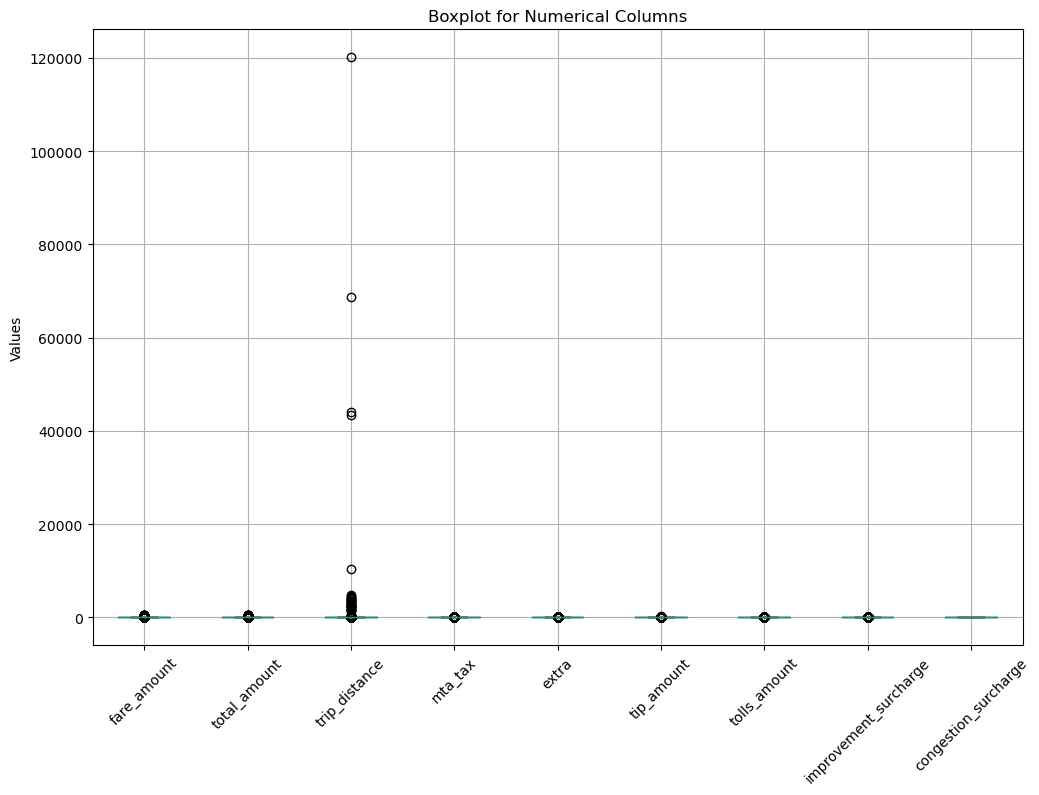

In [50]:
# Try to inspect with boxplot
# Select the columns to plot (Numerical Columns)
columns_to_plot = ["fare_amount", "total_amount", "trip_distance", "mta_tax", "extra", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge"]

# Plot boxplots for the selected columns
plt.figure(figsize=(12, 8))
taxi_trip[columns_to_plot].boxplot()
plt.title('Boxplot for Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()


There is much outliers. In column trip distance show outlier of outliers, so far away from others data.

In [51]:
taxi_trip[columns_to_plot].describe().loc[['mean','min','max']]

,fare_amount,total_amount,trip_distance,mta_tax,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
mean,16.463655,21.670171,8.168291,0.592344,0.834641,2.138937,0.163593,0.957121,0.689412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,490.000000,491.000000,120098.840000,2.750000,7.500000,222.220000,36.050000,1.000000,2.750000


- 0 value in trips distance and fare amount, check it, drop it if possible

In [52]:
# fare amount with zero '0' value
print(f'fare amount with zero value :', taxi_trip[taxi_trip['fare_amount'] == 0].shape[0])


fare amount with zero value : 71


In [53]:
# trip distance == 0
print(f'trip distance with zero value :', taxi_trip[taxi_trip['trip_distance'] == 0].shape[0])

trip distance with zero value : 2926


In [54]:
taxi_trip = taxi_trip[taxi_trip['fare_amount'] != 0] #exclude fare amount == 0
taxi_trip = taxi_trip[taxi_trip['trip_distance'] != 0] #exclude trip distance == 0

In [55]:
for cols in columns_to_plot:
    Q1 = taxi_trip[cols].quantile(0.25)
    Q3 = taxi_trip[cols].quantile(0.75)
    IQR = Q3 - Q1
    x = 1.5 * IQR
    upper_bound = Q3 + x
    lower_bound = Q3 - x

    total_outliers = len(taxi_trip[(taxi_trip[cols] < lower_bound) | (taxi_trip[cols] > upper_bound)])
    print(f'{cols} have {total_outliers} outliers.')

fare_amount have 4749 outliers.
total_amount have 4254 outliers.
trip_distance have 5912 outliers.
mta_tax have 12525 outliers.
extra have 3502 outliers.
tip_amount have 1769 outliers.
tolls_amount have 1484 outliers.
improvement_surcharge have 3860 outliers.
congestion_surcharge have 0 outliers.


**Another treatment**

total amount is came from : <br>
total amount = fare amount + tip amount + additional fee <br>
additonal fee = extra + mta_tax + improvement surcharge + congestion surcharge + tolls amount <br>

In [56]:
taxi_trip["additional_fee"] = taxi_trip[["extra", "mta_tax", "congestion_surcharge", "tolls_amount", "improvement_surcharge"]].sum(axis=1)

In [57]:
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64371 entries, 0 to 67922
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64371 non-null  int64         
 1   lpep_pickup_datetime   64371 non-null  datetime64[ns]
 2   pickup_time            64371 non-null  object        
 3   pickup_day             64371 non-null  object        
 4   duration               64371 non-null  float64       
 5   pickup_day_no          64371 non-null  int32         
 6   pickup_hour            64371 non-null  int32         
 7   pickup_month           64371 non-null  int32         
 8   pickup_year            64371 non-null  int32         
 9   lpep_dropoff_datetime  64371 non-null  datetime64[ns]
 10  RatecodeID             64371 non-null  float64       
 11  PULocationID           64371 non-null  int64         
 12  DOLocationID           64371 non-null  int64         
 13  passen

<h3><b>4.2.6. Summary</b></h3>

In [58]:
start = 68211
print("Data Cleaning Summary:")

print("Initial Number of Data:", start)

print("Data Dropped:")
print("  Outliers from Date Time:", 4)
print("  Dropped Columns:", 2, "(ehailz_fee and stor_and_fwd_flag)")
print("  Duplicated Values:", 612)
print("  Outliers:")
print("    Fare Amount:", 71)
print("    Trip Distance:", 2926)

total_dropped = 4 + 2 + 612 + 71 + 2926
print("Total Data Dropped:", total_dropped)

final_num = start - total_dropped
print("Number of Data After Cleaning:", final_num)

print("Percentage of Data Dropped:", round((total_dropped / start) * 100, 2), "percent")

print("Data Filled:")
print("  Number of Missing Values Filled:", 4324)

Data Cleaning Summary:
Initial Number of Data: 68211
Data Dropped:
  Outliers from Date Time: 4
  Dropped Columns: 2 (ehailz_fee and stor_and_fwd_flag)
  Duplicated Values: 612
  Outliers:
    Fare Amount: 71
    Trip Distance: 2926
Total Data Dropped: 3615
Number of Data After Cleaning: 64596
Percentage of Data Dropped: 5.3 percent
Data Filled:
  Number of Missing Values Filled: 4324


In [60]:
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64371 entries, 0 to 64370
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64371 non-null  int64         
 1   lpep_pickup_datetime   64371 non-null  datetime64[ns]
 2   pickup_time            64371 non-null  object        
 3   pickup_day             64371 non-null  object        
 4   duration               64371 non-null  float64       
 5   pickup_day_no          64371 non-null  int32         
 6   pickup_hour            64371 non-null  int32         
 7   pickup_month           64371 non-null  int32         
 8   pickup_year            64371 non-null  int32         
 9   lpep_dropoff_datetime  64371 non-null  datetime64[ns]
 10  RatecodeID             64371 non-null  float64       
 11  PULocationID           64371 non-null  int64         
 12  DOLocationID           64371 non-null  int64         
 13  p

## Analysis

**Calculating Profit**

We need to calculate the profit for each trip. Assuming profit can be calculated as:<br>
Profit = Total Amount − Cost<br>
Since the exact cost isn't provided, we'll assume it's primarily based on fare amounts and additional charges. For now, let's calculate profit as:<br>
Profit = Total Amount − (fare amount + tolls amount + extra + mta tax + improvement surcharge )<br>

count    64371.000000
mean         2.747495
std          3.514432
min         -6.860000
25%          0.000000
50%          2.100000
75%          4.290000
max        222.220000
Name: profit, dtype: float64

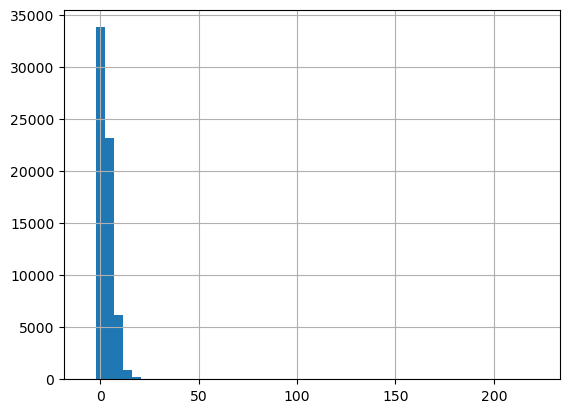

In [61]:
# Calculate profit for each trip
taxi_trip['profit'] = taxi_trip['total_amount'] - (taxi_trip['fare_amount'] + taxi_trip['tolls_amount'] + taxi_trip['extra'] + taxi_trip['mta_tax'] + taxi_trip['improvement_surcharge'])

# Basic statistics and distribution of profit
profit_stats = taxi_trip['profit'].describe()
profit_distribution = taxi_trip['profit'].hist(bins=50)

profit_stats

**The profit statistics indicate the following:**

Count: 64,371 trips.<br>
Mean Profit: $2.75<br>
Standard Deviation: $3.51<br>
Minimum Profit: -$6.86<br>
Maximum Profit: $222.22<br>
Median Profit: $2.10<br>
The histogram shows the distribution of profit, with most values clustering around the mean.

**Save File**

In [62]:
taxi_trip.reset_index(drop=True, inplace=True)
taxi_trip.to_csv("taxi_final.csv")